<a href="https://colab.research.google.com/github/101Vaibhav04/Portfolio-Optimization/blob/main/gerber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-5477b9cba533>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('total_df.csv', index_col='Date', parse_dates=True)
<ipython-input-1-5477b9cba533>:151: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('total_df.csv', index_col='Date', parse_dates=True)
<ipython-input-1-5477b9cba533>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (rt[i] >= upper_thresholds[i] and rt[j] >= upper_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] <= lower_thresholds[j]):
<ipython-input-1-5477b9cba533>:49: FutureWarning: Series.__get

Running backtest with transaction costs and Gerber Covariance Matrix...


<ipython-input-1-5477b9cba533>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (rt[i] >= upper_thresholds[i] and rt[j] >= upper_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] <= lower_thresholds[j]):
<ipython-input-1-5477b9cba533>:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif (rt[i] >= upper_thresholds[i] and rt[j] <= lower_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] >= upper_thresholds[j]):
<ipython-input-1-5477b9cba533>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent 


Backtest Results with Transaction Costs and Gerber Covariance Matrix:
Total Return (including initial capital): 3.3746
Profit-only Return: 237.4571%
Annualized Return: 34.95%
Annualized Volatility: 16.58%
Sharpe Ratio: 1.90
Sortino Ratio: 1.86
Max Drawdown: -15.77%
Calmar Ratio: 2.22


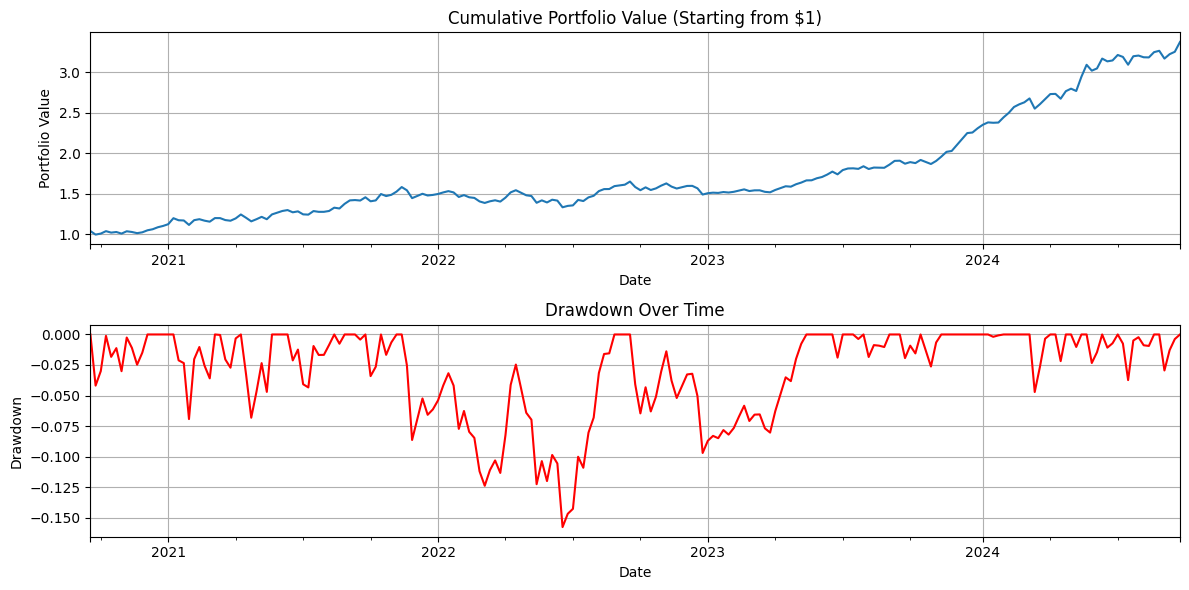

<ipython-input-1-5477b9cba533>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (rt[i] >= upper_thresholds[i] and rt[j] >= upper_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] <= lower_thresholds[j]):
<ipython-input-1-5477b9cba533>:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif (rt[i] >= upper_thresholds[i] and rt[j] <= lower_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] >= upper_thresholds[j]):



Stock weightage for week of 2024-09-26:
TRENT: 0.0500
BAJAJAUTO: 0.0500
HAL: 0.0500
VEDL: 0.0500
ADANIGREEN: 0.0500
BEL: 0.0500
SIEMENS: 0.0500
INDIGO: 0.0500
HINDZINC: 0.0500
ABB: 0.0500
NTPC: 0.0500
M&M: 0.0500
COALINDIA: 0.0500
BHARTIARTL: 0.0500
VBL: 0.0500
powergrid: 0.0500
ADANIENT.1: 0.0500
ONGC: 0.0500
SUNPHARMA: 0.0500
DLF: 0.0500


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
df = pd.read_csv('total_df.csv', index_col='Date', parse_dates=True)
# Function to calculate weekly returns
def calculate_weekly_returns(df):
    weekly_data = df.resample('W').last()
    weekly_returns = weekly_data.pct_change().dropna()
    return weekly_returns

# Function to rank stocks based on average returns
def rank_stocks(weekly_returns, window=50):
    avg_returns = weekly_returns.rolling(window=window).mean()
    latest_avg_returns = avg_returns.iloc[-1].sort_values(ascending=False)
    return latest_avg_returns.index.tolist()

# Function to get the top N stocks
def get_top_stocks(ranked_stocks, n=20):
    return ranked_stocks[:n]

# Gerber Covariance Calculation
def calculate_gerber_covariance(returns, c=0.5):
    """
    Calculate the Gerber covariance matrix for the given returns.
    'c' is the scaling parameter for the threshold, which is typically set to 0.5.
    """
    # Standard deviation for each asset
    std_dev = returns.std()

    # Calculate thresholds based on standard deviation
    upper_thresholds = c * std_dev
    lower_thresholds = -c * std_dev

    # Calculate concordant and discordant pairs
    num_assets = returns.shape[1]
    num_time_points = returns.shape[0]

    N_concordant = np.zeros((num_assets, num_assets))
    N_discordant = np.zeros((num_assets, num_assets))

    for t in range(num_time_points):
        rt = returns.iloc[t]
        for i in range(num_assets):
            for j in range(i + 1, num_assets):
                if (rt[i] >= upper_thresholds[i] and rt[j] >= upper_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] <= lower_thresholds[j]):
                    N_concordant[i, j] += 1
                    N_concordant[j, i] += 1
                elif (rt[i] >= upper_thresholds[i] and rt[j] <= lower_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] >= upper_thresholds[j]):
                    N_discordant[i, j] += 1
                    N_discordant[j, i] += 1

    # Compute Gerber covariance matrix
    G = (N_concordant - N_discordant) / num_time_points

    # Make matrix positive semi-definite if necessary
    eigvals = np.linalg.eigvals(G)
    if np.any(eigvals < 0):
        G += np.eye(num_assets) * abs(np.min(eigvals))

    # Final covariance matrix using std deviation
    gerber_cov = np.diag(std_dev.values) @ G @ np.diag(std_dev.values)

    return gerber_cov

# Portfolio variance function
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Min-variance portfolio optimization
def create_min_variance_portfolio(returns, c=0.5):
    n = len(returns.columns)
    init_guess = np.array([1/n for _ in range(n)])
    bounds = tuple((0, 1) for _ in range(n))
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    cov_matrix = calculate_gerber_covariance(returns, c)
    result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x

# Function to calculate stock weightage for portfolio
def get_stock_weightage(weekly_returns, current_date, c=0.5):
    data_slice = weekly_returns.loc[:current_date].iloc[-50:]
    if len(data_slice) < 50:
        raise ValueError("Not enough historical data before the target date.")

    ranked_stocks = rank_stocks(data_slice)
    top_stocks = get_top_stocks(ranked_stocks)
    top_stock_returns = data_slice[top_stocks]

    weights = create_min_variance_portfolio(top_stock_returns, c)
    stock_weights = dict(zip(top_stocks, weights))

    return stock_weights

# Function to calculate transaction costs
def calculate_transaction_costs(prev_weights, new_weights, transaction_cost=0.001):
    weight_diff = np.abs(np.array(new_weights) - np.array(prev_weights))
    total_transaction_cost = np.sum(weight_diff) * transaction_cost
    return total_transaction_cost

# Backtesting function
def backtest_strategy(df, transaction_cost=0.001, c=0.5):
    weekly_returns = calculate_weekly_returns(df)
    portfolio_returns = []
    weightage_history = []
    prev_weights = np.zeros(20)

    for i in range(50, len(weekly_returns)):
        current_date = weekly_returns.index[i-1]
        next_week = weekly_returns.index[i]

        try:
            weightage = get_stock_weightage(weekly_returns.iloc[:i], current_date, c)
            top_stocks = list(weightage.keys())
            new_weights = list(weightage.values())

            next_week_return = weekly_returns.loc[next_week][top_stocks].dot(new_weights)
            transaction_costs = calculate_transaction_costs(prev_weights, new_weights, transaction_cost)
            adjusted_return = next_week_return - transaction_costs

            portfolio_returns.append(adjusted_return)
            weightage_history.append((next_week, weightage))
            prev_weights = new_weights
        except ValueError:
            print(f"Skipping week {next_week} due to insufficient data")

    valid_index = weekly_returns.index[50:50+len(portfolio_returns)]

    return pd.Series(portfolio_returns, index=valid_index), weightage_history

# Function to calculate drawdown and maximum drawdown
def calculate_drawdown(cumulative_returns):
    drawdown = cumulative_returns / cumulative_returns.cummax() - 1
    max_drawdown = drawdown.min()
    return drawdown, max_drawdown

# Sortino ratio calculation
def sortino_ratio(returns, target=0, periods_per_year=52):
    downside_returns = returns[returns < target]
    downside_deviation = np.sqrt((downside_returns ** 2).mean()) * np.sqrt(periods_per_year)
    annualized_return = returns.mean() * periods_per_year
    return annualized_return / downside_deviation if downside_deviation != 0 else np.nan

# Calmar ratio calculation
def calmar_ratio(annualized_return, max_drawdown):
    return annualized_return / abs(max_drawdown) if max_drawdown != 0 else np.nan

# Load the dataset (make sure to update the file path or name if necessary)
df = pd.read_csv('total_df.csv', index_col='Date', parse_dates=True)

# Running the backtest
print("Running backtest with transaction costs and Gerber Covariance Matrix...")
portfolio_returns, weightage_history = backtest_strategy(df, transaction_cost=0.001, c=0.5)

# Calculating cumulative returns and metrics
cumulative_returns = (1 + portfolio_returns).cumprod()
total_return = cumulative_returns.iloc[-1]
profit_only_return = total_return - 1
annualized_return = (total_return ** (52/len(cumulative_returns)) - 1)
annualized_volatility = portfolio_returns.std() * np.sqrt(52)
sharpe_ratio = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(52)

# Calculating drawdown, calmar, and sortino ratios
drawdown, max_drawdown = calculate_drawdown(cumulative_returns)
calmar = calmar_ratio(annualized_return, max_drawdown)
sortino = sortino_ratio(portfolio_returns)

# Displaying results
print("\nBacktest Results with Transaction Costs and Gerber Covariance Matrix:")
print(f"Total Return (including initial capital): {total_return:.4f}")
print(f"Profit-only Return: {profit_only_return:.4%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Sortino Ratio: {sortino:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"Calmar Ratio: {calmar:.2f}")

# Plotting cumulative returns and drawdown
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
cumulative_returns.plot()
plt.title('Cumulative Portfolio Value (Starting from $1)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.grid(True)

plt.subplot(2, 1, 2)
drawdown.plot(color='red')
plt.title('Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaying the final stock weightage
last_date = df.index[-1]
try:
    weightage = get_stock_weightage(calculate_weekly_returns(df), last_date)
    print(f"\nStock weightage for week of {last_date.date()}:")
    for stock, weight in weightage.items():
        print(f"{stock}: {weight:.4f}")
except ValueError as e:
    print(f"Error: {e}")


<ipython-input-2-615b985b322c>:141: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('total_df.csv', index_col='Date', parse_dates=True)
<ipython-input-2-615b985b322c>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (rt[i] >= upper_thresholds[i] and rt[j] >= upper_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] <= lower_thresholds[j]):
<ipython-input-2-615b985b322c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif (rt[i] >= upper_thresholds[i] and rt[j] <= lower_thres

Running backtest with transaction costs and Gerber Covariance Matrix...


<ipython-input-2-615b985b322c>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (rt[i] >= upper_thresholds[i] and rt[j] >= upper_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] <= lower_thresholds[j]):
<ipython-input-2-615b985b322c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif (rt[i] >= upper_thresholds[i] and rt[j] <= lower_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] >= upper_thresholds[j]):
<ipython-input-2-615b985b322c>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent 


Backtest Results with Transaction Costs and Gerber Covariance Matrix:
Total Return (including initial capital): 3.3746
Profit-only Return: 237.4571%
Annualized Return: 34.95%
Annualized Volatility: 16.58%
Sharpe Ratio: 1.90
Sortino Ratio: 1.86
Max Drawdown: -15.77%
Calmar Ratio: 2.22


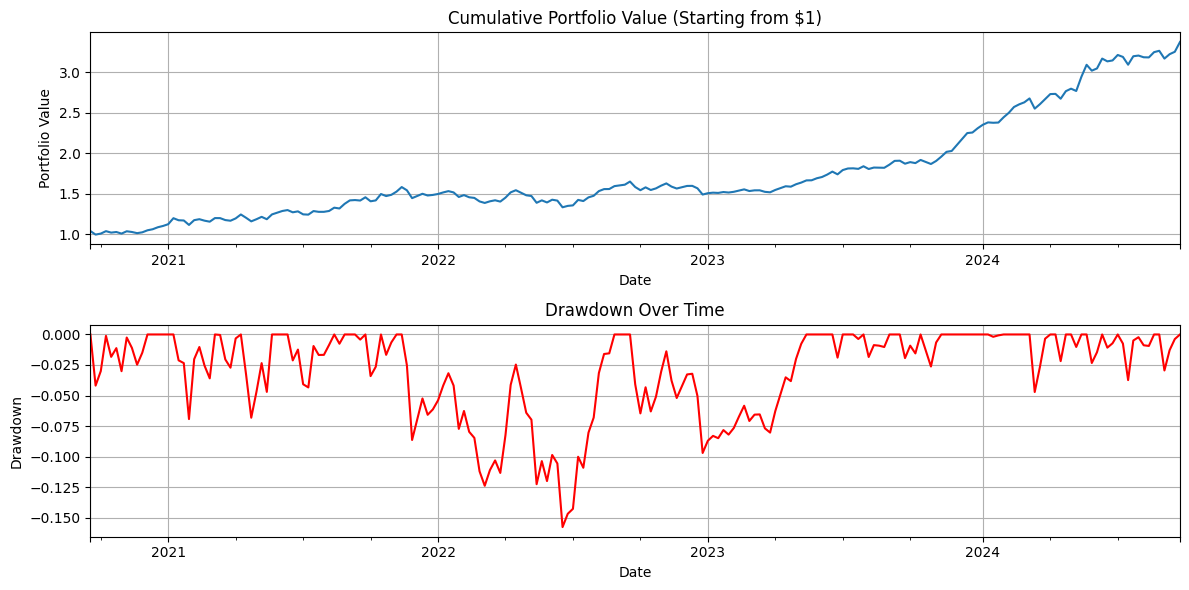

<ipython-input-2-615b985b322c>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (rt[i] >= upper_thresholds[i] and rt[j] >= upper_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] <= lower_thresholds[j]):
<ipython-input-2-615b985b322c>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif (rt[i] >= upper_thresholds[i] and rt[j] <= lower_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] >= upper_thresholds[j]):



Stock weightage for week of 2024-09-26:
TRENT: 0.0500
BAJAJAUTO: 0.0500
HAL: 0.0500
VEDL: 0.0500
ADANIGREEN: 0.0500
BEL: 0.0500
SIEMENS: 0.0500
INDIGO: 0.0500
HINDZINC: 0.0500
ABB: 0.0500
NTPC: 0.0500
M&M: 0.0500
COALINDIA: 0.0500
BHARTIARTL: 0.0500
VBL: 0.0500
powergrid: 0.0500
ADANIENT.1: 0.0500
ONGC: 0.0500
SUNPHARMA: 0.0500
DLF: 0.0500


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Function to calculate weekly returns
def calculate_weekly_returns(df):
    weekly_data = df.resample('W').last()
    weekly_returns = weekly_data.pct_change().dropna()
    return weekly_returns

# Function to rank stocks based on average returns
def rank_stocks(weekly_returns, window=50):
    avg_returns = weekly_returns.rolling(window=window).mean()
    latest_avg_returns = avg_returns.iloc[-1].sort_values(ascending=False)
    return latest_avg_returns.index.tolist()

# Function to get the top N stocks
def get_top_stocks(ranked_stocks, n=20):
    return ranked_stocks[:n]

# Gerber Covariance Calculation
def calculate_gerber_covariance(returns, c=0.5):
    std_dev = returns.std()
    upper_thresholds = c * std_dev
    lower_thresholds = -c * std_dev

    num_assets = returns.shape[1]
    num_time_points = returns.shape[0]

    N_concordant = np.zeros((num_assets, num_assets))
    N_discordant = np.zeros((num_assets, num_assets))

    for t in range(num_time_points):
        rt = returns.iloc[t]
        for i in range(num_assets):
            for j in range(i + 1, num_assets):
                if (rt[i] >= upper_thresholds[i] and rt[j] >= upper_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] <= lower_thresholds[j]):
                    N_concordant[i, j] += 1
                    N_concordant[j, i] += 1
                elif (rt[i] >= upper_thresholds[i] and rt[j] <= lower_thresholds[j]) or (rt[i] <= lower_thresholds[i] and rt[j] >= upper_thresholds[j]):
                    N_discordant[i, j] += 1
                    N_discordant[j, i] += 1

    G = (N_concordant - N_discordant) / num_time_points

    eigvals = np.linalg.eigvals(G)
    if np.any(eigvals < 0):
        G += np.eye(num_assets) * abs(np.min(eigvals))

    gerber_cov = np.diag(std_dev.values) @ G @ np.diag(std_dev.values)

    return gerber_cov

# Portfolio variance function
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Min-variance portfolio optimization
def create_min_variance_portfolio(returns, c=0.5):
    n = len(returns.columns)
    init_guess = np.array([1/n for _ in range(n)])
    bounds = tuple((0, 1) for _ in range(n))
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    cov_matrix = calculate_gerber_covariance(returns, c)
    result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

    # Return the optimized weights
    return result.x if result.success else np.zeros(n)

# Function to calculate stock weightage for portfolio
def get_stock_weightage(weekly_returns, current_date, c=0.5):
    data_slice = weekly_returns.loc[:current_date].iloc[-50:]
    if len(data_slice) < 50:
        raise ValueError("Not enough historical data before the target date.")

    ranked_stocks = rank_stocks(data_slice)
    top_stocks = get_top_stocks(ranked_stocks)
    top_stock_returns = data_slice[top_stocks]

    weights = create_min_variance_portfolio(top_stock_returns, c)
    stock_weights = dict(zip(top_stocks, weights))

    return stock_weights

# Function to calculate transaction costs
def calculate_transaction_costs(prev_weights, new_weights, transaction_cost=0.001):
    weight_diff = np.abs(np.array(new_weights) - np.array(prev_weights))
    total_transaction_cost = np.sum(weight_diff) * transaction_cost
    return total_transaction_cost

# Backtesting function
def backtest_strategy(df, transaction_cost=0.001, c=0.5):
    weekly_returns = calculate_weekly_returns(df)
    portfolio_returns = []
    weightage_history = []
    prev_weights = np.zeros(20)

    for i in range(50, len(weekly_returns)):
        current_date = weekly_returns.index[i-1]
        next_week = weekly_returns.index[i]

        try:
            weightage = get_stock_weightage(weekly_returns.iloc[:i], current_date, c)
            top_stocks = list(weightage.keys())
            new_weights = list(weightage.values())

            next_week_return = weekly_returns.loc[next_week][top_stocks].dot(new_weights)
            transaction_costs = calculate_transaction_costs(prev_weights, new_weights, transaction_cost)
            adjusted_return = next_week_return - transaction_costs

            portfolio_returns.append(adjusted_return)
            weightage_history.append((next_week, weightage))
            prev_weights = new_weights
        except ValueError:
            print(f"Skipping week {next_week} due to insufficient data")

    valid_index = weekly_returns.index[50:50+len(portfolio_returns)]

    return pd.Series(portfolio_returns, index=valid_index), weightage_history

# Function to calculate drawdown and maximum drawdown
def calculate_drawdown(cumulative_returns):
    drawdown = cumulative_returns / cumulative_returns.cummax() - 1
    max_drawdown = drawdown.min()
    return drawdown, max_drawdown

# Sortino ratio calculation
def sortino_ratio(returns, target=0, periods_per_year=52):
    downside_returns = returns[returns < target]
    downside_deviation = np.sqrt((downside_returns ** 2).mean()) * np.sqrt(periods_per_year)
    annualized_return = returns.mean() * periods_per_year
    return annualized_return / downside_deviation if downside_deviation != 0 else np.nan

# Calmar ratio calculation
def calmar_ratio(annualized_return, max_drawdown):
    return annualized_return / abs(max_drawdown) if max_drawdown != 0 else np.nan

# Load the dataset (make sure to update the file path or name if necessary)
df = pd.read_csv('total_df.csv', index_col='Date', parse_dates=True)

# Running the backtest
print("Running backtest with transaction costs and Gerber Covariance Matrix...")
portfolio_returns, weightage_history = backtest_strategy(df, transaction_cost=0.001, c=0.5)

# Calculating cumulative returns and metrics
cumulative_returns = (1 + portfolio_returns).cumprod()
total_return = cumulative_returns.iloc[-1]
profit_only_return = total_return - 1
annualized_return = (total_return ** (52/len(cumulative_returns)) - 1)
annualized_volatility = portfolio_returns.std() * np.sqrt(52)
sharpe_ratio = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(52)

# Calculating drawdown, calmar, and sortino ratios
drawdown, max_drawdown = calculate_drawdown(cumulative_returns)
calmar = calmar_ratio(annualized_return, max_drawdown)
sortino = sortino_ratio(portfolio_returns)

# Displaying results
print("\nBacktest Results with Transaction Costs and Gerber Covariance Matrix:")
print(f"Total Return (including initial capital): {total_return:.4f}")
print(f"Profit-only Return: {profit_only_return:.4%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Sortino Ratio: {sortino:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"Calmar Ratio: {calmar:.2f}")

# Plotting cumulative returns and drawdown
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
cumulative_returns.plot()
plt.title('Cumulative Portfolio Value (Starting from $1)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.grid(True)

plt.subplot(2, 1, 2)
drawdown.plot(color='red')
plt.title('Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaying the final stock weightage
last_date = df.index[-1]
try:
    weightage = get_stock_weightage(calculate_weekly_returns(df), last_date)
    print(f"\nStock weightage for week of {last_date.date()}:")
    for stock, weight in weightage.items():
        print(f"{stock}: {weight:.4f}")
except ValueError as e:
    print(f"Error: {e}")


<ipython-input-1-3d572adc4839>:161: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('total_df.csv', index_col='Date', parse_dates=True)


Loading data...
Loaded data with shape: (1238, 51)
Starting backtest...
Calculating weekly returns...
Generated weekly returns with shape: (261, 51)


Backtesting progress:   0%|          | 0/211 [00:00<?, ?it/s]<ipython-input-1-3d572adc4839>:57: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, method='ward')
Backtesting progress:   0%|          | 1/211 [00:01<05:16,  1.51s/it]<ipython-input-1-3d572adc4839>:57: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, method='ward')
Backtesting progress:   1%|          | 2/211 [00:02<03:52,  1.11s/it]<ipython-input-1-3d572adc4839>:57: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, method='ward')
Backtesting progress:   1%|▏         | 3/211 [00:03<03:35,  1.03s/it]<ipython-input-1-3d572adc4839>:57: ClusterWarning: The symmetric non-negative hollow obser


Backtest Results:
Total Return (including initial capital): 3.7851
This means for every $1 invested, you now have $3.79
Profit-only Return: 278.5115%
Annualized Return: 38.82%
Annualized Volatility: 17.70%
Sharpe Ratio: 1.95
Sortino Ratio: 1.88
Max Drawdown: -12.17%
Calmar Ratio: 3.19


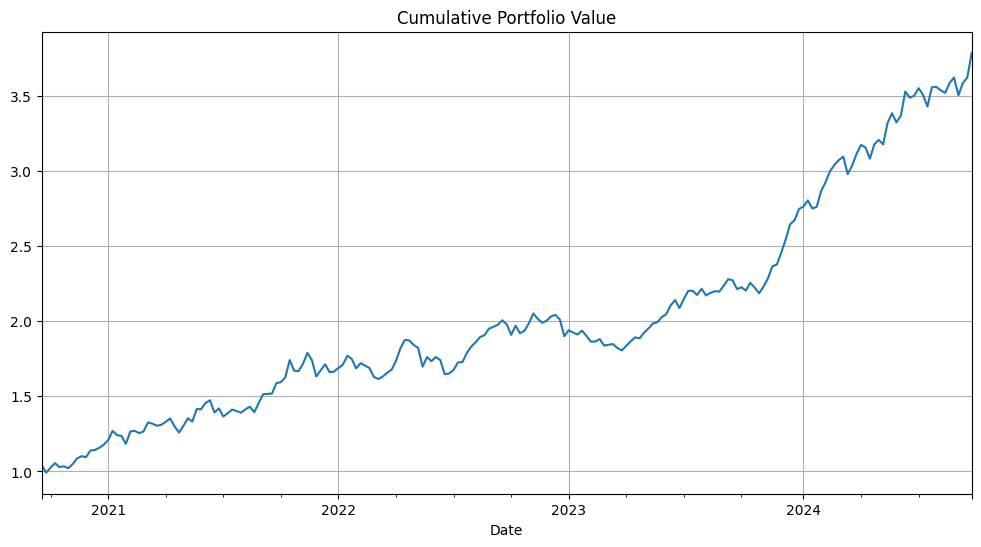

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from tqdm import tqdm

def calculate_weekly_returns(df):
    print("Calculating weekly returns...")
    weekly_data = df.resample('W').last()
    weekly_returns = weekly_data.pct_change().dropna()
    print(f"Generated weekly returns with shape: {weekly_returns.shape}")
    return weekly_returns

def rank_stocks(weekly_returns, window=50):
    avg_returns = weekly_returns.rolling(window=window).mean()
    latest_avg_returns = avg_returns.iloc[-1].sort_values(ascending=False)
    return latest_avg_returns.index.tolist()

def get_top_stocks(ranked_stocks, n=20):
    return ranked_stocks[:n]

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

def gerber_statistic(returns, threshold_factor=0.4):
    n_assets = returns.shape[1]
    gerber_cov = np.zeros((n_assets, n_assets))

    std_devs = returns.std()
    thresholds = threshold_factor * std_devs

    for i in range(n_assets):
        for j in range(i, n_assets):
            concordant = discordant = 0

            for t in range(len(returns)):
                r_i = returns.iloc[t, i]
                r_j = returns.iloc[t, j]

                if (r_i > thresholds.iloc[i] and r_j > thresholds.iloc[j]) or \
                   (r_i < -thresholds.iloc[i] and r_j < -thresholds.iloc[j]):
                    concordant += 1
                elif (r_i > thresholds.iloc[i] and r_j < -thresholds.iloc[j]) or \
                     (r_i < -thresholds.iloc[i] and r_j > thresholds.iloc[j]):
                    discordant += 1

            total_pairs = concordant + discordant
            gerber_stat = (concordant - discordant) / total_pairs if total_pairs > 0 else 0
            gerber_cov[i, j] = gerber_cov[j, i] = gerber_stat

    return gerber_cov

def cluster_stocks(cov_matrix, num_clusters=5):
    # Perform hierarchical clustering on stocks based on covariance
    dist_matrix = np.sqrt(2 * (1 - cov_matrix))  # Convert covariance matrix to distance matrix
    linkage_matrix = linkage(dist_matrix, method='ward')

    # Create clusters
    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    return clusters

def optimize_within_cluster(returns, cov_matrix):
    n = len(returns.columns)
    init_guess = np.array([1/n for _ in range(n)])
    bounds = tuple((0, 1) for _ in range(n))
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

    result = minimize(portfolio_variance, init_guess, args=(cov_matrix,),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x if result.success else init_guess

def nested_cluster_optimization(returns, gerber_cov_matrix, num_clusters=5):
    clusters = cluster_stocks(gerber_cov_matrix, num_clusters)
    unique_clusters = np.unique(clusters)

    cluster_weights = []
    asset_weights = np.zeros(returns.shape[1])

    for cluster in unique_clusters:
        # Get the indices of stocks in this cluster
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_returns = returns.iloc[:, cluster_indices]
        cluster_cov_matrix = gerber_cov_matrix[np.ix_(cluster_indices, cluster_indices)]

        # Optimize within each cluster
        weights_in_cluster = optimize_within_cluster(cluster_returns, cluster_cov_matrix)

        # Allocate equal weight to each cluster
        cluster_weight = 1 / num_clusters
        asset_weights[cluster_indices] = weights_in_cluster * cluster_weight

    return asset_weights

def calculate_drawdown(cumulative_returns):
    drawdown = cumulative_returns / cumulative_returns.cummax() - 1
    max_drawdown = drawdown.min()
    return drawdown, max_drawdown

def sortino_ratio(returns, target=0, periods_per_year=52):
    downside_returns = returns[returns < target]
    downside_deviation = np.sqrt((downside_returns ** 2).mean()) * np.sqrt(periods_per_year)
    annualized_return = returns.mean() * periods_per_year
    return annualized_return / downside_deviation if downside_deviation != 0 else np.nan

def calmar_ratio(annualized_return, max_drawdown):
    return annualized_return / abs(max_drawdown) if max_drawdown != 0 else np.nan

def get_stock_weightage_nco(weekly_returns, current_date, num_clusters=5):
    data_slice = weekly_returns.loc[:current_date].iloc[-50:]

    if len(data_slice) < 50:
        raise ValueError("Insufficient historical data")

    ranked_stocks = rank_stocks(data_slice)
    top_stocks = get_top_stocks(ranked_stocks)
    top_stock_returns = data_slice[top_stocks]

    gerber_cov_matrix = gerber_statistic(top_stock_returns)

    # Apply Nested Cluster Optimization (NCO)
    weights = nested_cluster_optimization(top_stock_returns, gerber_cov_matrix, num_clusters)
    return dict(zip(top_stocks, weights))

def backtest_strategy_nco(df):
    print("Starting backtest...")
    weekly_returns = calculate_weekly_returns(df)
    portfolio_returns = []
    weightage_history = []

    # Define the backtesting period
    start_idx = 50  # Need 50 weeks of historical data
    end_idx = len(weekly_returns)

    # Use tqdm for progress tracking
    for i in tqdm(range(start_idx, end_idx), desc="Backtesting progress"):
        current_date = weekly_returns.index[i-1]
        next_week = weekly_returns.index[i]

        try:
            # Get portfolio weights for the current period
            weightage = get_stock_weightage_nco(weekly_returns.iloc[:i], current_date)

            # Calculate next week's return
            next_week_return = weekly_returns.loc[next_week][list(weightage.keys())].dot(list(weightage.values()))

            portfolio_returns.append(next_week_return)
            weightage_history.append((next_week, weightage))

        except Exception as e:
            print(f"Error at {next_week}: {str(e)}")
            continue

    valid_index = weekly_returns.index[start_idx:start_idx+len(portfolio_returns)]
    return pd.Series(portfolio_returns, index=valid_index), weightage_history

def main():
    try:
        # Load data
        print("Loading data...")
        df = pd.read_csv('total_df.csv', index_col='Date', parse_dates=True)
        print(f"Loaded data with shape: {df.shape}")

        # Run backtest with NCO
        portfolio_returns, weightage_history = backtest_strategy_nco(df)

        if len(portfolio_returns) == 0:
            print("Error: No portfolio returns generated")
            return

        # Calculate cumulative returns and metrics
        cumulative_returns = (1 + portfolio_returns).cumprod()
        total_return = cumulative_returns.iloc[-1]
        profit_only_return = total_return - 1
        annualized_return = (total_return ** (52/len(cumulative_returns)) - 1)
        annualized_volatility = portfolio_returns.std() * np.sqrt(52)
        sharpe_ratio = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(52)

        # Calculate drawdown and additional metrics
        drawdown, max_drawdown = calculate_drawdown(cumulative_returns)
        calmar = calmar_ratio(annualized_return, max_drawdown)
        sortino = sortino_ratio(portfolio_returns)

        # Print backtest results
        print("\nBacktest Results:")
        print(f"Total Return (including initial capital): {total_return:.4f}")
        print(f"This means for every $1 invested, you now have ${total_return:.2f}")
        print(f"Profit-only Return: {profit_only_return:.4%}")
        print(f"Annualized Return: {annualized_return:.2%}")
        print(f"Annualized Volatility: {annualized_volatility:.2%}")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"Sortino Ratio: {sortino:.2f}")
        print(f"Max Drawdown: {max_drawdown:.2%}")
        print(f"Calmar Ratio: {calmar:.2f}")

        # Plot results
        plt.figure(figsize=(12, 6))
        cumulative_returns.plot()
        plt.title('Cumulative Portfolio Value')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()


<ipython-input-4-79731bb14a6f>:168: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('total_df.csv', index_col='Date', parse_dates=True)


Loading data...
Loaded data with shape: (1238, 51)
Starting backtest...
Calculating weekly returns...
Generated weekly returns with shape: (261, 51)


Backtesting progress:  38%|███▊      | 80/211 [01:12<01:48,  1.21it/s]<ipython-input-4-79731bb14a6f>:67: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, method='ward')
Backtesting progress: 100%|██████████| 211/211 [03:12<00:00,  1.09it/s]



Backtest Results:
Total Return: 188.3970
Profit-only Return: 18739.6953%
Annualized Return: 263.65%
Annualized Volatility: 87.47%
Sharpe Ratio: 1.93
Sortino Ratio: 1.99
Max Drawdown: -59.37%
Calmar Ratio: 4.44


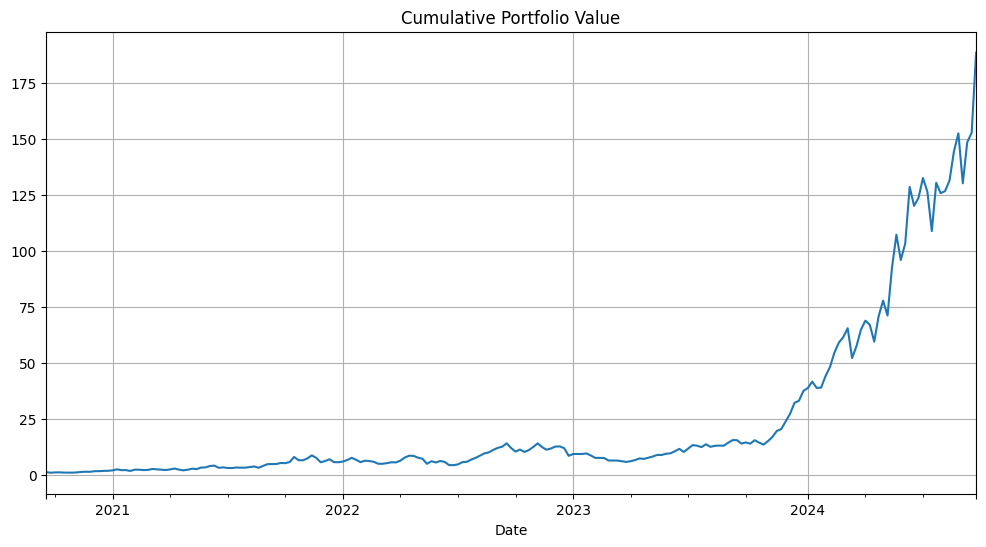

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.covariance import LedoitWolf
from tqdm import tqdm

def calculate_weekly_returns(df):
    print("Calculating weekly returns...")
    weekly_data = df.resample('W').last()
    weekly_returns = weekly_data.pct_change().dropna()
    print(f"Generated weekly returns with shape: {weekly_returns.shape}")
    return weekly_returns

def rank_stocks(weekly_returns, window=50):
    avg_returns = weekly_returns.rolling(window=window).mean()
    latest_avg_returns = avg_returns.iloc[-1].sort_values(ascending=False)
    return latest_avg_returns.index.tolist()

def get_top_stocks(ranked_stocks, n=20):
    return ranked_stocks[:n]

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

def gerber_statistic(returns, threshold_factor=0.4):
    n_assets = returns.shape[1]
    gerber_cov = np.zeros((n_assets, n_assets))

    std_devs = returns.std()
    thresholds = threshold_factor * std_devs

    for i in range(n_assets):
        for j in range(i, n_assets):
            concordant = discordant = 0

            for t in range(len(returns)):
                r_i = returns.iloc[t, i]
                r_j = returns.iloc[t, j]

                if (r_i > thresholds.iloc[i] and r_j > thresholds.iloc[j]) or \
                   (r_i < -thresholds.iloc[i] and r_j < -thresholds.iloc[j]):
                    concordant += 1
                elif (r_i > thresholds.iloc[i] and r_j < -thresholds.iloc[j]) or \
                     (r_i < -thresholds.iloc[i] and r_j > thresholds.iloc[j]):
                    discordant += 1

            total_pairs = concordant + discordant
            gerber_stat = (concordant - discordant) / total_pairs if total_pairs > 0 else 0
            gerber_cov[i, j] = gerber_cov[j, i] = gerber_stat

    return gerber_cov

def get_cov_matrix(returns, method='gerber', threshold_factor=0.4):
    if method == 'gerber':
        return gerber_statistic(returns, threshold_factor=threshold_factor)
    elif method == 'ledoit_wolf':
        cov_matrix = LedoitWolf().fit(returns).covariance_
        return cov_matrix
    else:
        return returns.cov()

def cluster_stocks(cov_matrix, num_clusters=5):
    # Improved distance matrix calculation based on the covariance matrix type
    dist_matrix = np.sqrt(2 * (1 - np.corrcoef(cov_matrix)))  # Use correlation to get consistent distance matrix
    linkage_matrix = linkage(dist_matrix, method='ward')

    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    return clusters

def optimize_within_cluster(returns, cov_matrix):
    n = len(returns.columns)
    init_guess = np.array([1/n for _ in range(n)])
    bounds = tuple((0, 1) for _ in range(n))
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

    result = minimize(portfolio_variance, init_guess, args=(cov_matrix,),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x if result.success else init_guess

def nested_cluster_optimization(returns, cov_matrix, num_clusters=5, cluster_weight_scheme='equal'):
    clusters = cluster_stocks(cov_matrix, num_clusters)
    unique_clusters = np.unique(clusters)

    cluster_weights = []
    asset_weights = np.zeros(returns.shape[1])

    for cluster in unique_clusters:
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_returns = returns.iloc[:, cluster_indices]
        cluster_cov_matrix = cov_matrix[np.ix_(cluster_indices, cluster_indices)]

        weights_in_cluster = optimize_within_cluster(cluster_returns, cluster_cov_matrix)

        # Improved cluster weighting scheme
        if cluster_weight_scheme == 'equal':
            cluster_weight = 1 / num_clusters
        elif cluster_weight_scheme == 'volatility_inverse':
            cluster_volatility = np.sqrt(np.diag(cluster_cov_matrix)).mean()
            cluster_weight = 1 / cluster_volatility
        else:
            cluster_weight = 1 / num_clusters

        asset_weights[cluster_indices] = weights_in_cluster * cluster_weight

    return asset_weights

def calculate_drawdown(cumulative_returns):
    drawdown = cumulative_returns / cumulative_returns.cummax() - 1
    max_drawdown = drawdown.min()
    return drawdown, max_drawdown

def sortino_ratio(returns, target=0, periods_per_year=52):
    downside_returns = returns[returns < target]
    downside_deviation = np.sqrt((downside_returns ** 2).mean()) * np.sqrt(periods_per_year)
    annualized_return = returns.mean() * periods_per_year
    return annualized_return / downside_deviation if downside_deviation != 0 else np.nan

def calmar_ratio(annualized_return, max_drawdown):
    return annualized_return / abs(max_drawdown) if max_drawdown != 0 else np.nan

def get_stock_weightage_nco(weekly_returns, current_date, num_clusters=5, cov_method='gerber', cluster_weight_scheme='equal'):
    data_slice = weekly_returns.loc[:current_date].iloc[-50:]

    if len(data_slice) < 50:
        raise ValueError("Insufficient historical data")

    ranked_stocks = rank_stocks(data_slice)
    top_stocks = get_top_stocks(ranked_stocks)
    top_stock_returns = data_slice[top_stocks]

    cov_matrix = get_cov_matrix(top_stock_returns, method=cov_method)

    weights = nested_cluster_optimization(top_stock_returns, cov_matrix, num_clusters, cluster_weight_scheme)
    return dict(zip(top_stocks, weights))

def backtest_strategy_nco(df, cov_method='gerber', num_clusters=5, cluster_weight_scheme='equal'):
    print("Starting backtest...")
    weekly_returns = calculate_weekly_returns(df)
    portfolio_returns = []
    weightage_history = []

    start_idx = 50
    end_idx = len(weekly_returns)

    for i in tqdm(range(start_idx, end_idx), desc="Backtesting progress"):
        current_date = weekly_returns.index[i-1]
        next_week = weekly_returns.index[i]

        try:
            weightage = get_stock_weightage_nco(weekly_returns.iloc[:i], current_date, num_clusters, cov_method, cluster_weight_scheme)
            next_week_return = weekly_returns.loc[next_week][list(weightage.keys())].dot(list(weightage.values()))

            portfolio_returns.append(next_week_return)
            weightage_history.append((next_week, weightage))

        except Exception as e:
            print(f"Error at {next_week}: {str(e)}")
            continue

    valid_index = weekly_returns.index[start_idx:start_idx+len(portfolio_returns)]
    return pd.Series(portfolio_returns, index=valid_index), weightage_history

def main():
    try:
        print("Loading data...")
        df = pd.read_csv('total_df.csv', index_col='Date', parse_dates=True)
        print(f"Loaded data with shape: {df.shape}")

        portfolio_returns, weightage_history = backtest_strategy_nco(df, cov_method='gerber', num_clusters=5, cluster_weight_scheme='volatility_inverse')

        if len(portfolio_returns) == 0:
            print("Error: No portfolio returns generated")
            return

        cumulative_returns = (1 + portfolio_returns).cumprod()
        total_return = cumulative_returns.iloc[-1]
        profit_only_return = total_return - 1
        annualized_return = (total_return ** (52/len(cumulative_returns)) - 1)
        annualized_volatility = portfolio_returns.std() * np.sqrt(52)
        sharpe_ratio = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(52)

        drawdown, max_drawdown = calculate_drawdown(cumulative_returns)
        calmar = calmar_ratio(annualized_return, max_drawdown)
        sortino = sortino_ratio(portfolio_returns)

        print("\nBacktest Results:")
        print(f"Total Return: {total_return:.4f}")
        print(f"Profit-only Return: {profit_only_return:.4%}")
        print(f"Annualized Return: {annualized_return:.2%}")
        print(f"Annualized Volatility: {annualized_volatility:.2%}")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"Sortino Ratio: {sortino:.2f}")
        print(f"Max Drawdown: {max_drawdown:.2%}")
        print(f"Calmar Ratio: {calmar:.2f}")

        plt.figure(figsize=(12, 6))
        cumulative_returns.plot()
        plt.title('Cumulative Portfolio Value')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
  main()

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.covariance import LedoitWolf
from tqdm import tqdm

def calculate_weekly_returns(df):
    print("Calculating weekly returns...")
    weekly_data = df.resample('W').last()
    weekly_returns = weekly_data.pct_change().dropna()
    print(f"Generated weekly returns with shape: {weekly_returns.shape}")
    return weekly_returns

def rank_stocks(weekly_returns, window=50):
    avg_returns = weekly_returns.rolling(window=window).mean()
    latest_avg_returns = avg_returns.iloc[-1].sort_values(ascending=False)
    return latest_avg_returns.index.tolist()

def get_top_stocks(ranked_stocks, n=20):
    return ranked_stocks[:n]

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

def gerber_statistic(returns, threshold_factor=0.4):
    n_assets = returns.shape[1]
    gerber_cov = np.zeros((n_assets, n_assets))

    std_devs = returns.std()
    thresholds = threshold_factor * std_devs

    for i in range(n_assets):
        for j in range(i, n_assets):
            concordant = discordant = 0

            for t in range(len(returns)):
                r_i = returns.iloc[t, i]
                r_j = returns.iloc[t, j]

                if (r_i > thresholds.iloc[i] and r_j > thresholds.iloc[j]) or \
                   (r_i < -thresholds.iloc[i] and r_j < -thresholds.iloc[j]):
                    concordant += 1
                elif (r_i > thresholds.iloc[i] and r_j < -thresholds.iloc[j]) or \
                     (r_i < -thresholds.iloc[i] and r_j > thresholds.iloc[j]):
                    discordant += 1

            total_pairs = concordant + discordant
            gerber_stat = (concordant - discordant) / total_pairs if total_pairs > 0 else 0
            gerber_cov[i, j] = gerber_cov[j, i] = gerber_stat

    return gerber_cov

def get_cov_matrix(returns, method='sample', threshold_factor=0.4):
    if method == 'gerber':
        return gerber_statistic(returns, threshold_factor=threshold_factor)
    elif method == 'ledoit_wolf':
        cov_matrix = LedoitWolf().fit(returns).covariance_
        return cov_matrix
    elif method == 'sample':  # New condition to use sample covariance
        return returns.cov()
    else:
        raise ValueError("Unsupported covariance method")

def cluster_stocks(cov_matrix, num_clusters=5):
    # Improved distance matrix calculation based on the covariance matrix type
    dist_matrix = np.sqrt(2 * (1 - np.corrcoef(cov_matrix)))  # Use correlation to get consistent distance matrix
    linkage_matrix = linkage(dist_matrix, method='ward')

    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    return clusters

def optimize_within_cluster(returns, cov_matrix):
    n = len(returns.columns)
    init_guess = np.array([1/n for _ in range(n)])
    bounds = tuple((0, 1) for _ in range(n))
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

    result = minimize(portfolio_variance, init_guess, args=(cov_matrix,),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x if result.success else init_guess

def nested_cluster_optimization(returns, cov_matrix, num_clusters=5, cluster_weight_scheme='equal'):
    clusters = cluster_stocks(cov_matrix, num_clusters)
    unique_clusters = np.unique(clusters)

    cluster_weights = []
    asset_weights = np.zeros(returns.shape[1])

    for cluster in unique_clusters:
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_returns = returns.iloc[:, cluster_indices]
        cluster_cov_matrix = cov_matrix[np.ix_(cluster_indices, cluster_indices)]

        weights_in_cluster = optimize_within_cluster(cluster_returns, cluster_cov_matrix)

        # Improved cluster weighting scheme
        if cluster_weight_scheme == 'equal':
            cluster_weight = 1 / num_clusters
        elif cluster_weight_scheme == 'volatility_inverse':
            cluster_volatility = np.sqrt(np.diag(cluster_cov_matrix)).mean()
            cluster_weight = 1 / cluster_volatility
        else:
            cluster_weight = 1 / num_clusters

        asset_weights[cluster_indices] = weights_in_cluster * cluster_weight

    return asset_weights

def calculate_drawdown(cumulative_returns):
    drawdown = cumulative_returns / cumulative_returns.cummax() - 1
    max_drawdown = drawdown.min()
    return drawdown, max_drawdown

def sortino_ratio(returns, target=0, periods_per_year=52):
    downside_returns = returns[returns < target]
    downside_deviation = np.sqrt((downside_returns ** 2).mean()) * np.sqrt(periods_per_year)
    annualized_return = returns.mean() * periods_per_year
    return annualized_return / downside_deviation if downside_deviation != 0 else np.nan

def calmar_ratio(annualized_return, max_drawdown):
    return annualized_return / abs(max_drawdown) if max_drawdown != 0 else np.nan

def get_stock_weightage_nco(weekly_returns, current_date, num_clusters=5, cov_method='sample', cluster_weight_scheme='equal'):
    data_slice = weekly_returns.loc[:current_date].iloc[-50:]

    if len(data_slice) < 50:
        raise ValueError("Insufficient historical data")

    ranked_stocks = rank_stocks(data_slice)
    top_stocks = get_top_stocks(ranked_stocks)
    top_stock_returns = data_slice[top_stocks]

    cov_matrix = get_cov_matrix(top_stock_returns, method=cov_method)

    weights = nested_cluster_optimization(top_stock_returns, cov_matrix, num_clusters, cluster_weight_scheme)
    return dict(zip(top_stocks, weights))

def backtest_strategy_nco(df, cov_method='sample', num_clusters=5, cluster_weight_scheme='equal'):
    print("Starting backtest...")
    weekly_returns = calculate_weekly_returns(df)
    portfolio_returns = []
    weightage_history = []

    start_idx = 50
    end_idx = len(weekly_returns)

    for i in tqdm(range(start_idx, end_idx), desc="Backtesting progress"):
        current_date = weekly_returns.index[i-1]
        next_week = weekly_returns.index[i]

        try:
            weightage = get_stock_weightage_nco(weekly_returns.iloc[:i], current_date, num_clusters, cov_method, cluster_weight_scheme)
            next_week_return = weekly_returns.loc[next_week][list(weightage.keys())].dot(list(weightage.values()))

            portfolio_returns.append(next_week_return)
            weightage_history.append((next_week, weightage))

        except Exception as e:
            print(f"Error at {next_week}: {str(e)}")
            continue

    valid_index = weekly_returns.index[start_idx:start_idx+len(portfolio_returns)]
    return pd.Series(portfolio_returns, index=valid_index), weightage_history

def main():
    try:
        print("Loading data...")
        df = pd.read_csv('total_df.csv', index_col='Date', parse_dates=True)
        print(f"Loaded data with shape: {df.shape}")

        portfolio_returns, weightage_history = backtest_strategy_nco(df, cov_method='sample', num_clusters=5, cluster_weight_scheme='volatility_inverse')

        if len(portfolio_returns) == 0:
            print("Error: No portfolio returns generated")
            return

        cumulative_returns = (1 + portfolio_returns).cumprod()
        total_return = cumulative_returns.iloc[-1]
        profit_only_return = total_return - 1
        annualized_return = (total_return ** (52/len(cumulative_returns)) - 1)
        annualized_volatility = portfolio_returns.std() * np.sqrt(52)
        sharpe_ratio = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(52)

        drawdown, max_drawdown = calculate_drawdown(cumulative_returns)
        calmar = calmar_ratio(annualized_return, max_drawdown)
        sortino = sortino_ratio(portfolio_returns)

        print("\nBacktest Results:")
        print(f"Total Return: {total_return:.4f}")
        print(f"Profit-only Return: {profit_only_return:.4%}")
        print(f"Annualized Return: {annualized_return:.2%}")
        print(f"Annualized Volatility: {annualized_volatility:.2%}")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print(f"Sortino Ratio: {sortino:.2f}")
        print(f"Max Drawdown: {max_drawdown:.2%}")
        print(f"Calmar Ratio: {calmar:.2f}")

        plt.figure(figsize=(12, 6))
        cumulative_returns.plot()
        plt.title('Cumulative Portfolio Value')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()


<ipython-input-6-93de136fb2c7>:170: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('total_df.csv', index_col='Date', parse_dates=True)


Loading data...
Loaded data with shape: (1238, 51)
Starting backtest...
Calculating weekly returns...
Generated weekly returns with shape: (261, 51)


Backtesting progress:   0%|          | 0/211 [00:00<?, ?it/s]

Error at 2020-09-20 00:00:00: (array([[ 3],
       [ 5],
       [12]]), array([[ 3,  5, 12]]))
Error at 2020-09-27 00:00:00: (array([[ 1],
       [ 7],
       [ 8],
       [10],
       [15],
       [16]]), array([[ 1,  7,  8, 10, 15, 16]]))
Error at 2020-10-04 00:00:00: (array([[ 2],
       [ 3],
       [11]]), array([[ 2,  3, 11]]))
Error at 2020-10-11 00:00:00: (array([[ 2],
       [ 3],
       [11]]), array([[ 2,  3, 11]]))
Error at 2020-10-18 00:00:00: (array([[ 2],
       [ 3],
       [12]]), array([[ 2,  3, 12]]))


Backtesting progress:   9%|▊         | 18/211 [00:00<00:02, 83.71it/s]

Error at 2020-10-25 00:00:00: (array([[ 0],
       [12],
       [14],
       [17]]), array([[ 0, 12, 14, 17]]))
Error at 2020-11-01 00:00:00: (array([[ 2],
       [ 4],
       [14]]), array([[ 2,  4, 14]]))
Error at 2020-11-08 00:00:00: (array([[ 0],
       [ 1],
       [ 7],
       [ 8],
       [13],
       [14],
       [15]]), array([[ 0,  1,  7,  8, 13, 14, 15]]))
Error at 2020-11-15 00:00:00: (array([[3],
       [4]]), array([[3, 4]]))
Error at 2020-11-22 00:00:00: (array([[3],
       [5]]), array([[3, 5]]))
Error at 2020-11-29 00:00:00: (array([[3],
       [5]]), array([[3, 5]]))
Error at 2020-12-06 00:00:00: (array([[3],
       [4]]), array([[3, 4]]))
Error at 2020-12-13 00:00:00: (array([[ 6],
       [ 8],
       [ 9],
       [10],
       [13],
       [15]]), array([[ 6,  8,  9, 10, 13, 15]]))
Error at 2020-12-20 00:00:00: (array([[ 7],
       [ 8],
       [10],
       [11]]), array([[ 7,  8, 10, 11]]))
Error at 2020-12-27 00:00:00: (array([[3],
       [4]]), array([[3, 4]]))
Er

Backtesting progress:  17%|█▋        | 36/211 [00:00<00:02, 85.83it/s]

Error at 2021-02-21 00:00:00: (array([[ 4],
       [ 8],
       [12],
       [14]]), array([[ 4,  8, 12, 14]]))
Error at 2021-02-28 00:00:00: (array([[ 1],
       [ 2],
       [ 4],
       [ 6],
       [ 7],
       [11],
       [13],
       [17],
       [18]]), array([[ 1,  2,  4,  6,  7, 11, 13, 17, 18]]))
Error at 2021-03-07 00:00:00: (array([[ 9],
       [10],
       [13],
       [17],
       [18]]), array([[ 9, 10, 13, 17, 18]]))
Error at 2021-03-14 00:00:00: (array([[13],
       [14],
       [15]]), array([[13, 14, 15]]))
Error at 2021-03-21 00:00:00: (array([[ 5],
       [12],
       [13],
       [17]]), array([[ 5, 12, 13, 17]]))
Error at 2021-03-28 00:00:00: (array([[ 7],
       [11],
       [12],
       [14]]), array([[ 7, 11, 12, 14]]))
Error at 2021-04-04 00:00:00: (array([[ 4],
       [11],
       [12],
       [15]]), array([[ 4, 11, 12, 15]]))
Error at 2021-04-11 00:00:00: (array([[ 6],
       [ 9],
       [12],
       [13]]), array([[ 6,  9, 12, 13]]))
Error at 2021-04-18

Backtesting progress:  21%|██▏       | 45/211 [00:00<00:02, 78.38it/s]

Error at 2021-06-13 00:00:00: (array([[ 7],
       [11],
       [15]]), array([[ 7, 11, 15]]))
Error at 2021-06-20 00:00:00: (array([[ 8],
       [ 9],
       [14]]), array([[ 8,  9, 14]]))
Error at 2021-06-27 00:00:00: (array([[ 6],
       [ 9],
       [12]]), array([[ 6,  9, 12]]))
Error at 2021-07-04 00:00:00: (array([[ 6],
       [11],
       [12]]), array([[ 6, 11, 12]]))
Error at 2021-07-11 00:00:00: (array([[ 2],
       [11],
       [12],
       [17],
       [18]]), array([[ 2, 11, 12, 17, 18]]))
Error at 2021-07-18 00:00:00: (array([[ 4],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [14],
       [15],
       [17]]), array([[ 4,  7,  8,  9, 10, 11, 14, 15, 17]]))
Error at 2021-07-25 00:00:00: (array([[ 4],
       [11],
       [12],
       [16],
       [18]]), array([[ 4, 11, 12, 16, 18]]))
Error at 2021-08-01 00:00:00: (array([[ 4],
       [11],
       [12],
       [14],
       [18]]), array([[ 4, 11, 12, 14, 18]]))
Error at 2021-08-08 00:00:00: (array

Backtesting progress:  26%|██▌       | 55/211 [00:00<00:01, 84.10it/s]

Error at 2021-10-03 00:00:00: (array([[11],
       [19]]), array([[11, 19]]))
Error at 2021-10-10 00:00:00: (array([[14],
       [18]]), array([[14, 18]]))


Backtesting progress:  30%|███       | 64/211 [00:00<00:02, 71.70it/s]

Error at 2021-10-17 00:00:00: (array([[ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 9],
       [13],
       [16],
       [18],
       [19]]), array([[ 4,  5,  6,  7,  9, 13, 16, 18, 19]]))
Error at 2021-10-24 00:00:00: (array([[ 1],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [10],
       [13],
       [14],
       [19]]), array([[ 1,  5,  6,  7,  8, 10, 13, 14, 19]]))
Error at 2021-10-31 00:00:00: (array([[ 1],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [14],
       [15],
       [17],
       [18]]), array([[ 1,  5,  6,  7,  8, 14, 15, 17, 18]]))
Error at 2021-11-07 00:00:00: (array([[ 0],
       [ 2],
       [ 3],
       [ 9],
       [11],
       [13]]), array([[ 0,  2,  3,  9, 11, 13]]))
Error at 2021-11-14 00:00:00: (array([[ 0],
       [ 2],
       [ 3],
       [ 6],
       [ 8],
       [11]]), array([[ 0,  2,  3,  6,  8, 11]]))
Error at 2021-11-21 00:00:00: (array([[ 5],
       [14]]), array([[ 5, 14]]))
Error at 2021-11-28 00:00:00: (array([[

Backtesting progress:  39%|███▉      | 82/211 [00:01<00:01, 78.08it/s]

Error at 2022-01-30 00:00:00: (array([[ 2],
       [ 3],
       [ 5],
       [16],
       [17],
       [18]]), array([[ 2,  3,  5, 16, 17, 18]]))
Error at 2022-02-06 00:00:00: (array([[ 3],
       [ 8],
       [18],
       [19]]), array([[ 3,  8, 18, 19]]))
Error at 2022-02-13 00:00:00: (array([[ 4],
       [ 8],
       [19]]), array([[ 4,  8, 19]]))
Error at 2022-02-20 00:00:00: (array([[ 5],
       [ 8],
       [15]]), array([[ 5,  8, 15]]))
Error at 2022-02-27 00:00:00: (array([[ 8],
       [14],
       [15],
       [18]]), array([[ 8, 14, 15, 18]]))
Error at 2022-03-06 00:00:00: (array([[ 4],
       [ 6],
       [13]]), array([[ 4,  6, 13]]))
Error at 2022-03-13 00:00:00: (array([[ 7],
       [10],
       [19]]), array([[ 7, 10, 19]]))
Error at 2022-03-20 00:00:00: (array([[ 6],
       [13],
       [14]]), array([[ 6, 13, 14]]))
Error at 2022-03-27 00:00:00: (array([[ 0],
       [ 8],
       [12],
       [18],
       [19]]), array([[ 0,  8, 12, 18, 19]]))
Error at 2022-04-03 00:00:

Backtesting progress:  48%|████▊     | 101/211 [00:01<00:01, 81.07it/s]

Error at 2022-05-22 00:00:00: (array([[ 2],
       [11],
       [13],
       [17],
       [18]]), array([[ 2, 11, 13, 17, 18]]))
Error at 2022-05-29 00:00:00: (array([[ 3],
       [11],
       [13],
       [18]]), array([[ 3, 11, 13, 18]]))
Error at 2022-06-05 00:00:00: (array([[ 3],
       [ 7],
       [ 9],
       [13]]), array([[ 3,  7,  9, 13]]))
Error at 2022-06-12 00:00:00: (array([[ 3],
       [16],
       [17]]), array([[ 3, 16, 17]]))
Error at 2022-06-19 00:00:00: (array([[ 4],
       [ 6],
       [ 8],
       [10]]), array([[ 4,  6,  8, 10]]))
Error at 2022-06-26 00:00:00: (array([[ 3],
       [14],
       [19]]), array([[ 3, 14, 19]]))
Error at 2022-07-03 00:00:00: (array([[ 5],
       [ 8],
       [13],
       [15],
       [16]]), array([[ 5,  8, 13, 15, 16]]))
Error at 2022-07-10 00:00:00: (array([[ 7],
       [ 8],
       [12],
       [16],
       [18],
       [19]]), array([[ 7,  8, 12, 16, 18, 19]]))
Error at 2022-07-17 00:00:00: (array([[ 2],
       [ 6],
       [11]])

Backtesting progress:  52%|█████▏    | 110/211 [00:01<00:01, 80.79it/s]

Error at 2022-09-25 00:00:00: (array([[ 7],
       [13],
       [15],
       [16],
       [17],
       [19]]), array([[ 7, 13, 15, 16, 17, 19]]))
Error at 2022-10-02 00:00:00: (array([[ 8],
       [ 9],
       [15],
       [16],
       [17],
       [19]]), array([[ 8,  9, 15, 16, 17, 19]]))
Error at 2022-10-09 00:00:00: (array([[ 1],
       [ 3],
       [ 8],
       [11]]), array([[ 1,  3,  8, 11]]))
Error at 2022-10-16 00:00:00: (array([[ 9],
       [11],
       [15],
       [18],
       [19]]), array([[ 9, 11, 15, 18, 19]]))
Error at 2022-10-23 00:00:00: (array([[ 9],
       [10],
       [18]]), array([[ 9, 10, 18]]))
Error at 2022-10-30 00:00:00: (array([[ 8],
       [ 9],
       [10],
       [17],
       [18],
       [19]]), array([[ 8,  9, 10, 17, 18, 19]]))
Error at 2022-11-06 00:00:00: (array([[ 8],
       [ 9],
       [13],
       [16]]), array([[ 8,  9, 13, 16]]))
Error at 2022-11-13 00:00:00: (array([[ 8],
       [ 9],
       [11],
       [15],
       [17]]), array([[ 8,  9, 

Backtesting progress:  56%|█████▋    | 119/211 [00:01<00:01, 75.14it/s]

Error at 2022-12-18 00:00:00: (array([[ 8],
       [ 9],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [18]]), array([[ 8,  9, 11, 12, 13, 14, 15, 16, 18]]))
Error at 2022-12-25 00:00:00: (array([[ 7],
       [ 9],
       [10],
       [12],
       [13],
       [17],
       [19]]), array([[ 7,  9, 10, 12, 13, 17, 19]]))


Backtesting progress:  61%|██████    | 128/211 [00:01<00:01, 77.40it/s]

Error at 2023-01-01 00:00:00: (array([[13],
       [14]]), array([[13, 14]]))
Error at 2023-01-08 00:00:00: (array([[17],
       [19]]), array([[17, 19]]))
Error at 2023-01-15 00:00:00: (array([[11],
       [12]]), array([[11, 12]]))
Error at 2023-01-22 00:00:00: (array([[ 5],
       [ 9],
       [10],
       [13],
       [14],
       [15],
       [18],
       [19]]), array([[ 5,  9, 10, 13, 14, 15, 18, 19]]))
Error at 2023-01-29 00:00:00: (array([[ 5],
       [12],
       [15]]), array([[ 5, 12, 15]]))
Error at 2023-02-05 00:00:00: (array([[ 4],
       [11],
       [12],
       [13],
       [14],
       [17]]), array([[ 4, 11, 12, 13, 14, 17]]))
Error at 2023-02-12 00:00:00: (array([[10],
       [16],
       [19]]), array([[10, 16, 19]]))
Error at 2023-02-19 00:00:00: (array([[ 4],
       [ 5],
       [ 9],
       [14],
       [17],
       [18],
       [19]]), array([[ 4,  5,  9, 14, 17, 18, 19]]))
Error at 2023-02-26 00:00:00: (array([[ 3],
       [ 5],
       [ 7],
       [10],
    

Backtesting progress:  65%|██████▍   | 137/211 [00:01<00:00, 80.51it/s]

Error at 2023-04-23 00:00:00: (array([[ 9],
       [11],
       [12],
       [16],
       [17],
       [18],
       [19]]), array([[ 9, 11, 12, 16, 17, 18, 19]]))
Error at 2023-04-30 00:00:00: (array([[1],
       [2]]), array([[1, 2]]))
Error at 2023-05-07 00:00:00: (array([[1],
       [2]]), array([[1, 2]]))


Backtesting progress:  69%|██████▉   | 146/211 [00:01<00:00, 81.35it/s]

Error at 2023-05-14 00:00:00: (array([[1],
       [2]]), array([[1, 2]]))
Error at 2023-05-21 00:00:00: (array([[ 6],
       [ 7],
       [ 9],
       [12],
       [18]]), array([[ 6,  7,  9, 12, 18]]))
Error at 2023-05-28 00:00:00: (array([[ 5],
       [ 7],
       [12],
       [15],
       [18],
       [19]]), array([[ 5,  7, 12, 15, 18, 19]]))
Error at 2023-06-04 00:00:00: (array([[1],
       [3],
       [5]]), array([[1, 3, 5]]))
Error at 2023-06-11 00:00:00: (array([[ 2],
       [10],
       [11],
       [13],
       [18]]), array([[ 2, 10, 11, 13, 18]]))
Error at 2023-06-18 00:00:00: (array([[0],
       [2]]), array([[0, 2]]))
Error at 2023-06-25 00:00:00: (array([[1],
       [2],
       [9]]), array([[1, 2, 9]]))
Error at 2023-07-02 00:00:00: (array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [10],
       [11],
       [12],
       [15],
       [17],
       [18],
       [19]]), array([[ 0,  1,  2,  3,  4, 10, 11, 12, 15, 17, 18, 19]]))
Error at 2023-07-09 00

Backtesting progress:  77%|███████▋  | 163/211 [00:02<00:00, 74.54it/s]

Error at 2023-09-03 00:00:00: (array([[ 0],
       [ 3],
       [14],
       [17]]), array([[ 0,  3, 14, 17]]))
Error at 2023-09-10 00:00:00: (array([[ 4],
       [ 7],
       [18]]), array([[ 4,  7, 18]]))
Error at 2023-09-17 00:00:00: (array([[ 5],
       [10],
       [17],
       [18],
       [19]]), array([[ 5, 10, 17, 18, 19]]))
Error at 2023-09-24 00:00:00: (array([[ 1],
       [ 2],
       [ 5],
       [ 9],
       [12],
       [14],
       [15],
       [18]]), array([[ 1,  2,  5,  9, 12, 14, 15, 18]]))
Error at 2023-10-01 00:00:00: (array([[13],
       [17]]), array([[13, 17]]))
Error at 2023-10-08 00:00:00: (array([[ 3],
       [ 8],
       [11],
       [12]]), array([[ 3,  8, 11, 12]]))
Error at 2023-10-15 00:00:00: (array([[ 3],
       [ 8],
       [ 9],
       [12],
       [14],
       [19]]), array([[ 3,  8,  9, 12, 14, 19]]))
Error at 2023-10-22 00:00:00: (array([[ 2],
       [ 7],
       [14],
       [17]]), array([[ 2,  7, 14, 17]]))
Error at 2023-10-29 00:00:00: (array

Backtesting progress:  81%|████████  | 171/211 [00:02<00:00, 72.50it/s]<ipython-input-6-93de136fb2c7>:69: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dist_matrix, method='ward')


Error at 2023-12-17 00:00:00: (array([[ 2],
       [ 7],
       [16],
       [17]]), array([[ 2,  7, 16, 17]]))
Error at 2023-12-24 00:00:00: (array([[ 0],
       [ 4],
       [ 5],
       [ 7],
       [10],
       [11],
       [13]]), array([[ 0,  4,  5,  7, 10, 11, 13]]))
Error at 2023-12-31 00:00:00: (array([[ 1],
       [ 4],
       [ 7],
       [ 9],
       [10],
       [11],
       [18]]), array([[ 1,  4,  7,  9, 10, 11, 18]]))
Error at 2024-01-07 00:00:00: (array([[ 1],
       [ 4],
       [ 8],
       [ 9],
       [10],
       [11],
       [17]]), array([[ 1,  4,  8,  9, 10, 11, 17]]))
Error at 2024-01-14 00:00:00: (array([[ 4],
       [ 6],
       [15],
       [19]]), array([[ 4,  6, 15, 19]]))
Error at 2024-01-21 00:00:00: (array([[ 1],
       [ 2],
       [ 3],
       [ 5],
       [ 6],
       [10],
       [11],
       [12],
       [15],
       [16],
       [17]]), array([[ 1,  2,  3,  5,  6, 10, 11, 12, 15, 16, 17]]))
Error at 2024-01-28 00:00:00: (array([[ 3],
       [ 6],

Backtesting progress:  85%|████████▍ | 179/211 [00:02<00:00, 57.37it/s]

Error at 2024-02-18 00:00:00: (array([[ 2],
       [ 5],
       [11],
       [13]]), array([[ 2,  5, 11, 13]]))
Error at 2024-02-25 00:00:00: (array([[14],
       [17]]), array([[14, 17]]))
Error at 2024-03-03 00:00:00: (array([[ 4],
       [ 8],
       [18]]), array([[ 4,  8, 18]]))
Error at 2024-03-10 00:00:00: (array([[ 2],
       [ 4],
       [ 8],
       [14]]), array([[ 2,  4,  8, 14]]))
Error at 2024-03-17 00:00:00: (array([[ 2],
       [ 3],
       [ 4],
       [17]]), array([[ 2,  3,  4, 17]]))


Backtesting progress:  88%|████████▊ | 186/211 [00:02<00:00, 50.11it/s]

Error at 2024-03-24 00:00:00: (array([[ 1],
       [ 7],
       [10]]), array([[ 1,  7, 10]]))
Error at 2024-03-31 00:00:00: (array([[ 1],
       [ 7],
       [11]]), array([[ 1,  7, 11]]))
Error at 2024-04-07 00:00:00: (array([[ 4],
       [ 8],
       [13]]), array([[ 4,  8, 13]]))
Error at 2024-04-14 00:00:00: (array([[ 8],
       [ 9],
       [11],
       [14]]), array([[ 8,  9, 11, 14]]))
Error at 2024-04-21 00:00:00: (array([[ 3],
       [ 9],
       [13]]), array([[ 3,  9, 13]]))
Error at 2024-04-28 00:00:00: (array([[ 0],
       [10],
       [19]]), array([[ 0, 10, 19]]))
Error at 2024-05-05 00:00:00: (array([[ 0],
       [10]]), array([[ 0, 10]]))


Backtesting progress:  91%|█████████ | 192/211 [00:02<00:00, 43.14it/s]

Error at 2024-05-12 00:00:00: (array([[13],
       [16],
       [17]]), array([[13, 16, 17]]))
Error at 2024-05-19 00:00:00: (array([[ 0],
       [14]]), array([[ 0, 14]]))
Error at 2024-05-26 00:00:00: (array([[ 1],
       [15]]), array([[ 1, 15]]))
Error at 2024-06-02 00:00:00: (array([[ 6],
       [ 8],
       [17]]), array([[ 6,  8, 17]]))


Backtesting progress: 100%|██████████| 211/211 [00:02<00:00, 71.02it/s]

Error at 2024-06-09 00:00:00: (array([[ 0],
       [14]]), array([[ 0, 14]]))
Error at 2024-06-16 00:00:00: (array([[0],
       [9]]), array([[0, 9]]))
Error at 2024-06-23 00:00:00: (array([[ 0],
       [10]]), array([[ 0, 10]]))
Error at 2024-06-30 00:00:00: (array([[ 8],
       [19]]), array([[ 8, 19]]))
Error at 2024-07-07 00:00:00: (array([[ 0],
       [10]]), array([[ 0, 10]]))
Error at 2024-07-14 00:00:00: (array([[0],
       [8]]), array([[0, 8]]))
Error at 2024-07-21 00:00:00: (array([[0],
       [7]]), array([[0, 7]]))
Error at 2024-07-28 00:00:00: (array([[ 0],
       [10]]), array([[ 0, 10]]))
Error at 2024-08-04 00:00:00: (array([[ 5],
       [14],
       [19]]), array([[ 5, 14, 19]]))
Error at 2024-08-11 00:00:00: (array([[ 3],
       [ 9],
       [14]]), array([[ 3,  9, 14]]))
Error at 2024-08-18 00:00:00: (array([[ 2],
       [ 8],
       [16]]), array([[ 2,  8, 16]]))
Error at 2024-08-25 00:00:00: (array([[ 2],
       [ 9],
       [17]]), array([[ 2,  9, 17]]))
Error at